# 範例1. 使用自動微分估算簡單線性迴歸的參數(w、b)
## $ y = wx + b$

In [ ]:
# 載入套件
import numpy as np 
import tensorflow as tf 

## 定義訓練函數

In [ ]:
# 定義損失函數
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

In [ ]:
# 定義預測值函數
def predict(X):
    return w * X + b    

In [1]:
# 定義訓練函數
def train(X, y, epochs=40, lr=0.0001):
    current_loss=0                                # 損失函數值
    for epoch in range(epochs):                   # 執行訓練週期
        with tf.GradientTape() as t:              # 自動微分
            t.watch(tf.constant(X))               # 宣告 TensorFlow 常數參與自動微分
            current_loss = loss(y, predict(X))    # 計算損失函數值
        
        dw, db = t.gradient(current_loss, [w, b]) # 取得 w, b 個別的梯度

        # 更新權重：新權重 = 原權重 — 學習率(learning_rate) * 梯度(gradient)
        w.assign_sub(lr * dw) # w -= lr * dw
        b.assign_sub(lr * db) # b -= lr * db

        # 顯示每一訓練週期的損失函數
        print(f'Epoch {epoch}: Loss: {current_loss.numpy()}') 

## 產生隨機資料

In [2]:
# 產生線性隨機資料100筆，介於 0-50
n = 100
X = np.linspace(0, 50, n) 
y = np.linspace(0, 50, n) 
  
# 資料加一點雜訊(noise)
X += np.random.uniform(-10, 10, n) 
y += np.random.uniform(-10, 10, n) 

In [3]:
X

array([ 5.05683393, -8.13353909, -6.52464149, -5.50940943, 11.66358626,
        9.31853754, -5.14093202,  5.01731668, 10.57559768, -4.78618216,
        8.44986335,  4.16497382, -1.27368303, 10.85146034, 15.30914714,
       14.26535163, -0.6331097 , 13.38742355,  5.51097519,  7.21306803,
        8.68363776, 11.61408491,  9.02919419,  2.37980562,  9.81521208,
       16.88044306,  9.3212144 , 18.78037109, 16.00073258,  9.26335497,
       16.86699858,  9.40279713, 10.98483436, 19.59055894, 17.52213998,
       10.88094558, 26.86063116, 18.1373789 , 14.29707927, 24.5175653 ,
       20.07366248, 23.82504613, 16.39122476, 27.79423363, 27.79278329,
       19.10799661, 25.49652043, 23.54407923, 15.03184501, 29.90820105,
       22.50911764, 18.84882127, 32.76063904, 24.73656876, 24.21448625,
       29.36006822, 25.74498214, 30.62373175, 26.90133786, 28.08688738,
       38.9461851 , 25.87609548, 37.8438448 , 37.7069019 , 36.27067197,
       31.65913731, 42.10272761, 31.09995469, 26.48630227, 39.85

In [4]:
y

array([ 2.38619247, -3.82597851,  5.342754  , -0.22965924, 10.31906107,
        1.31012597, -2.59944819,  0.98036408, -2.53023523, -3.89497905,
        8.04977276,  7.10383458,  4.58969484,  8.05577634, -1.2762334 ,
       12.56327823, 16.32239383,  2.03126244,  3.86361026, 14.78686812,
       17.07589569, 14.2002982 ,  5.92602891,  4.71014098,  7.43518557,
        4.67401872, 13.22523957, 18.78654672,  6.28702838, 14.36463968,
       14.60763563,  7.02462127, 20.57982258, 20.49972768, 20.40041445,
       14.18823199, 10.50301796, 17.27589055, 28.58775655, 22.88628943,
       12.52098699, 26.84182246, 26.3892489 , 18.53832592, 20.71381709,
       19.93247216, 15.80723015, 19.7253919 , 14.86651948, 28.75855758,
       33.37882854, 23.1185613 , 30.80023235, 35.14025344, 36.37698381,
       24.36227103, 28.61423123, 31.92153211, 37.42577826, 37.6251155 ,
       23.99382037, 40.6644072 , 31.72834581, 32.89175579, 26.26632139,
       35.94883329, 40.02587834, 39.74611919, 27.11969056, 31.85

## 執行訓練

In [7]:
# w、b 初始值均設為 0
w = tf.Variable(0.0)
b = tf.Variable(0.0)

# 執行訓練
train(X, y)

# w、b 的最佳解
print(f'w={w.numpy()}, b={b.numpy()}')

Epoch 0: Loss: 890.1063232421875
Epoch 1: Loss: 607.071533203125
Epoch 2: Loss: 419.7763671875
Epoch 3: Loss: 295.8358459472656
Epoch 4: Loss: 213.81948852539062
Epoch 5: Loss: 159.5459747314453
Epoch 6: Loss: 123.63106536865234
Epoch 7: Loss: 99.86465454101562
Epoch 8: Loss: 84.1374282836914
Epoch 9: Loss: 73.7300033569336
Epoch 10: Loss: 66.84292602539062
Epoch 11: Loss: 62.28538513183594
Epoch 12: Loss: 59.269386291503906
Epoch 13: Loss: 57.27349090576172
Epoch 14: Loss: 55.95263671875
Epoch 15: Loss: 55.078487396240234
Epoch 16: Loss: 54.49993133544922
Epoch 17: Loss: 54.116981506347656
Epoch 18: Loss: 53.86347579956055
Epoch 19: Loss: 53.69562911987305
Epoch 20: Loss: 53.584468841552734
Epoch 21: Loss: 53.51081085205078
Epoch 22: Loss: 53.461978912353516
Epoch 23: Loss: 53.429569244384766
Epoch 24: Loss: 53.408023834228516
Epoch 25: Loss: 53.393672943115234
Epoch 26: Loss: 53.384090423583984
Epoch 27: Loss: 53.377655029296875
Epoch 28: Loss: 53.373294830322266
Epoch 29: Loss: 53.3

## 顯示迴歸線

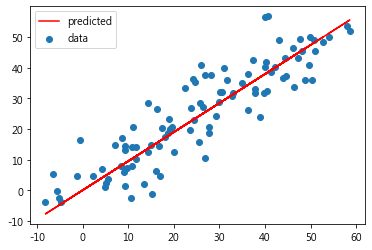

In [6]:
import matplotlib.pyplot as plt 

plt.scatter(X, y, label='data')
plt.plot(X, predict(X), 'r-', label='predicted')
plt.legend()